<div class="alert alert-success">  
<h3><strong>Imports and Machine Learn Workflow</strong></h3>
</div>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
df = pd.read_csv('cust_seg.csv')

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#memanggil explanatory variables (Features)
X = iris.data

#memanggil response variables (Target)
y = iris.target

#membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()

#mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [7]:
features_names = iris.feature_names
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
#Training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, #feature
                                                    y, #target
                                                    test_size=0.3, #ukuran testing set (30%) sedangkan training set (70%)
                                                    random_state=1) 
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


In [10]:
#load iris dataset sebagai pandas dataframe
iris = load_iris(as_frame=True)
iris_feature_df = iris.data
iris_feature_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#training model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [12]:
#evaluasi model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9777777777777777


In [13]:
data_baru = [[3,7,9,1],
             [5,3,8,2]]

preds = model.predict(data_baru)
preds

#output akan menghasilkan nilai prediksi nilai target

array([2, 2])

In [14]:
pred_species = [iris.target_names[p] for p in preds]
print(f'Hasil prediksi: {pred_species}')

Hasil prediksi: ['virginica', 'virginica']


<div class="alert alert-success">  
<h3><strong>Binarisation</strong></h3>
</div>

In [15]:
sample_data_bin = np.array([[2.1, -1.9, 5.5],
                            [-1.5, 2.4, 3.5],
                            [0.5, -7.9, 5.6],
                            [5.9, 2.3, -5.8]])

sample_data_bin

array([[ 2.1, -1.9,  5.5],
       [-1.5,  2.4,  3.5],
       [ 0.5, -7.9,  5.6],
       [ 5.9,  2.3, -5.8]])

In [16]:
sample_data_bin.shape

(4, 3)

In [17]:
from sklearn import preprocessing

preprocessor = preprocessing.Binarizer(threshold=0.5)
binarised_data = preprocessor.transform(sample_data_bin)
binarised_data

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

<div class="alert alert-success">  
<h3><strong>Scaling</strong></h3>
</div>

In [18]:
preprocessor_sc = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_data = preprocessor_sc.fit_transform(sample_data_bin)
scaled_data

array([[0.48648649, 0.58252427, 0.99122807],
       [0.        , 1.        , 0.81578947],
       [0.27027027, 0.        , 1.        ],
       [1.        , 0.99029126, 0.        ]])

<div class="alert alert-success">  
<h3><strong>L1 Normalisation: Least Absolute Deviation</strong></h3>
</div>

In [19]:
L1_normalized_data = preprocessing.normalize(sample_data_bin, norm='l1')
L1_normalized_data

array([[ 0.22105263, -0.2       ,  0.57894737],
       [-0.2027027 ,  0.32432432,  0.47297297],
       [ 0.03571429, -0.56428571,  0.4       ],
       [ 0.42142857,  0.16428571, -0.41428571]])

<div class="alert alert-success">  
<h3><strong>L2 Normalisation: Least Squares</strong></h3>
</div>

In [20]:
L2_normalized_data = preprocessing.normalize(sample_data_bin, norm='l2')
L2_normalized_data

array([[ 0.33946114, -0.30713151,  0.88906489],
       [-0.33325106,  0.53320169,  0.7775858 ],
       [ 0.05156558, -0.81473612,  0.57753446],
       [ 0.68706914,  0.26784051, -0.6754239 ]])

<div class="alert alert-success">  
<h3><strong>Simple Linear Regression</strong></h3>
</div>

In [21]:
import matplotlib.pyplot as plt

In [22]:
pizza = {'diameter': [6, 8, 10, 14, 18], 'harga': [7, 9, 13, 17.5, 18]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


**Visualization for Determine Model Used**

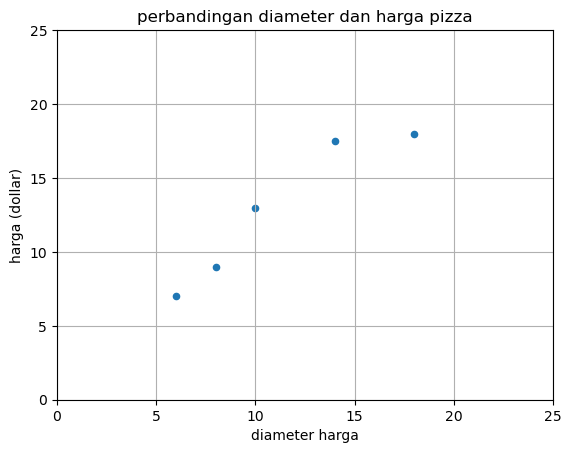

In [23]:
pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter harga')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [24]:
X_pizza = np.array(pizza_df['diameter'])
y_pizza = np.array(pizza_df['harga'])


In [25]:
X_pizza = X_pizza.reshape(-1, 1)
X_pizza.shape
#Diubah ke dalam bentuk dua dimensi karena feature pada sklearn hanya mengenal sekumpulan array dua dimensi

(5, 1)

In [26]:
X_pizza

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

**Training Simple Linear Regression Model**

In [27]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_pizza, y_pizza)
#Yang bakal di fit di model itu yang akan direshape

LinearRegression()

**Visualisasi Simple Linear Regression Model**

In [28]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model_lr.predict(X_vis)

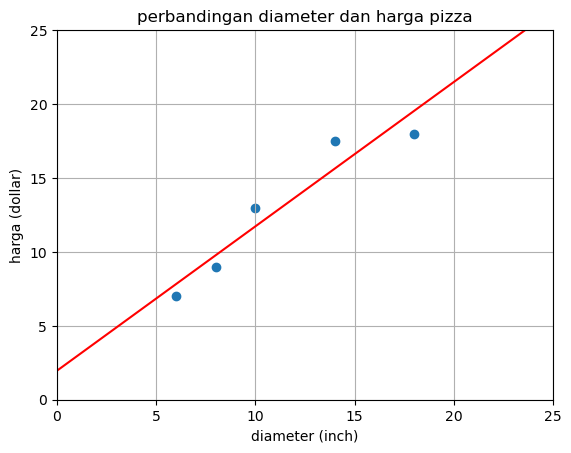

In [29]:
plt.scatter(X_pizza, y_pizza)
plt.plot(X_vis, y_vis, '-r')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [30]:
print(f'intercept: {model_lr.intercept_}')
print(f'slope: {model_lr.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [31]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [32]:
prediksi_harga = model_lr.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [33]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


<div class="alert alert-success">  
<h3><strong>Evaluasi Simple Linear Regression Model</strong></h3>
</div>

**Training & Testing Dataset**

In [34]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8,9,11,16,12]).reshape(-1, 1)
y_test = np.array([11,8.5,15,18,11])

**Training Simple Linear Regression Model**

In [35]:
model_slr = LinearRegression()
model_slr.fit(X_train, y_train)

LinearRegression()

**Evaluasi SLR dengan coefficient of Determination atau R-quared(R2)**

In [36]:
from sklearn.metrics import r2_score

y_pred = model_slr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

#X_test digunakan untuk membuat nilai prediksi sedangkan y_test digunakan untuk membandingkan nilainya dengan nilai prediksi

R-squared: 0.6620052929422553


<div class="alert alert-success">  
<h3><strong>Latihan Memprediksi Harga Rumah Berdasarkan Jumlah Kamar</strong></h3>
</div>

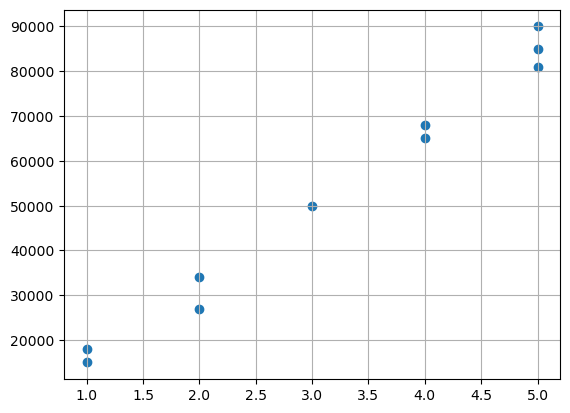

In [37]:
##buat data jumlah kamar
bedrooms = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

plt.scatter(bedrooms, house_price)
plt.grid(True)
plt.show()

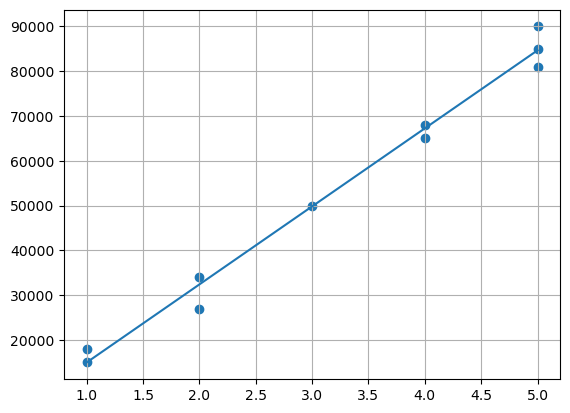

In [38]:
from sklearn.linear_model import LinearRegression

bedrooms = bedrooms.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))
plt.grid(True)
plt.show()

<div class="alert alert-success">  
<h3><strong>Logistic Regression</strong></h3>
</div>

In [39]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [40]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [41]:
df_dummies = pd.get_dummies(df)
df_dummies

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


In [42]:
#pisahkan atribut dan label
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']

X = df_dummies[predictions]
y = df_dummies['Purchased']

In [43]:
#lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [44]:
from sklearn.model_selection import train_test_split

#bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [45]:
from sklearn import linear_model

#latih model dengan fungsi fit
model_logistic_reg = linear_model.LogisticRegression()
model_logistic_reg.fit(X_train, y_train)


LogisticRegression()

In [46]:
#uji akurasi model
model_logistic_reg.score(X_test, y_test)

0.825

<div class="alert alert-success">  
<h3><strong>Latihan Membuat Model Unsupervised Learning dengan Teknik K-Mean Clustering</strong></h3>
</div>

In [47]:
df = pd.read_csv('Mall_Customers.csv')

In [48]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
#ubah nama kolom
df = df.rename(
    columns={
        'Gender': 'gender',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    })

In [50]:
#ubah data kategorik menjadi data numerik
df['gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [51]:
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [52]:
from sklearn.cluster import KMeans

#menghilangkan kolom customerid dan gender
Xm = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Xm) #model
    clusters.append(km.inertia_)

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [53]:
Xm.shape

(200, 3)

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Inertia')

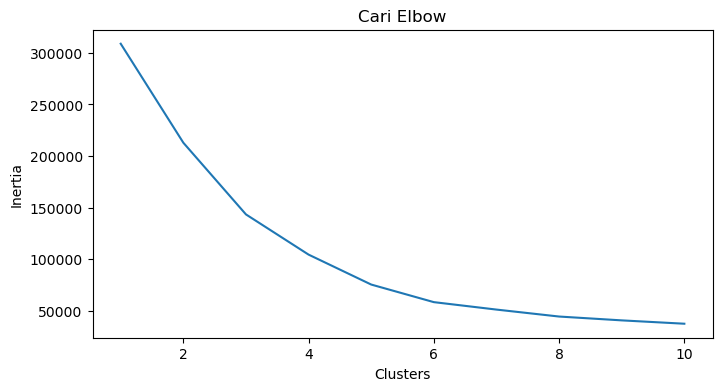

In [54]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


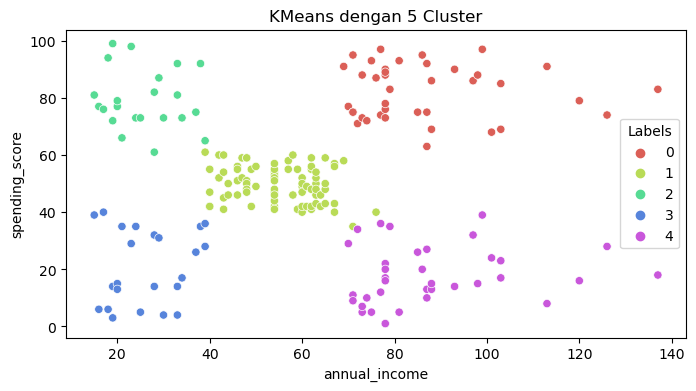

In [55]:
#melatih kembali model dan membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(Xm)

#menambahkan kolom label pada dataset
Xm['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=Xm['annual_income'],
                y=Xm['spending_score'],
                hue=Xm['Labels'],
                palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')
plt.show()

<div class="alert alert-success">  
<h3><strong>Latihan SKLearn Principal Component Analysis</strong></h3>
</div>

In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
 
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)

**Metode Tanpa PCA**

In [57]:
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.9666666666666667

**Metode Dengan PCA**

In [58]:
from sklearn.decomposition import PCA
 
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
 
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
 
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

In [59]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [60]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

<div class="alert alert-success">  
<h3><strong>Latihan SKlearn SVM untuk Klasifikasi</strong></h3>
</div>

In [61]:
df = pd.read_csv('diabetes.csv')

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
#memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df.iloc[:, :8]
y = df.loc[:, 'Outcome']

In [65]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [66]:
from sklearn.model_selection import train_test_split


# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [67]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [68]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

<div class="alert alert-success">  
<h3><strong>Latihan SKLearn SVR untuk Regression</strong></h3>
</div>

In [69]:
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [71]:
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

In [72]:
# mengubah bentuk atribut menjadi array 2 dimensi
# Ketika hanya terdapat satu atribut pada dataframe,
# maka atribut tersebut perlu diubah bentuknya agar
# bisa diterima oleh model dari library SKLearn.
X = np.array(X)
X = X[:, np.newaxis] # sama dengan X = np.array(X).reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [73]:
from sklearn.svm import SVR
#membangun model dengan parameter C, gamma, dan kernel
model_svr = SVR(C=1000, gamma=0.05, kernel='rbf')

#melatih model dengan fungsi fit
model_svr.fit(X,y)

SVR(C=1000, gamma=0.05)

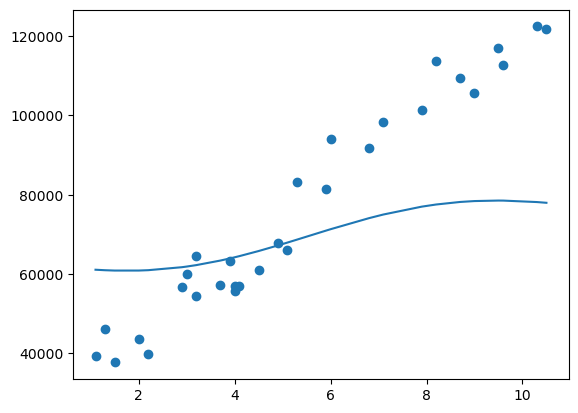

In [74]:
# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model_svr.predict(X))

<div class="alert alert-success">  
<h3><strong>Latihan SKLearn dengan Teknik Grid Search</strong></h3>
</div>

In [75]:
from sklearn.model_selection import GridSearchCV

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [76]:
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']
 
# mengubah bentuk atribut
X = np.array(X)
X = X.reshape(-1,1)

In [77]:
# membangun model dengan parameter C, gamma, dan kernel
model_svr = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model_svr, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [78]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [79]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru_svr  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru_svr.fit(X,y)

SVR(C=100000, gamma=0.005)

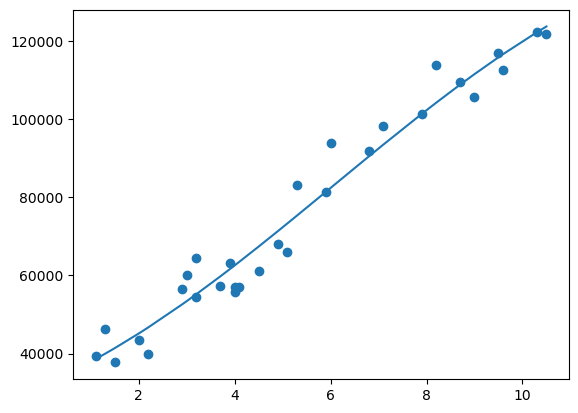

In [80]:
plt.scatter(X, y)
plt.plot(X, model_baru_svr.predict(X))

<div class="alert alert-success">  
<h3><strong>Evaluation Metrics for Classification</strong></h3>
</div>

- TP (True Positive) - The model correctly predicted the positive class.
- TN (True Negative) - The model correctly predicted the negative class.
- FP (False Positive) - The model predicted the positive class, but it's actually negative.
- FN (False Negative) - The model predicted the negative class, but it's actually positive.

Misalkan kita memiliki model yang mengklasifikasikan apakah email itu spam atau bukan spam. Setiap email dapat memiliki label "spam" (positif) atau "bukan spam" (negatif). Ketika kita menerapkan model tersebut pada dataset, kita dapat memiliki empat kemungkinan hasil:

Model mengklasifikasikan email sebagai spam, dan itu benar (True Positives, TP).
Model mengklasifikasikan email sebagai bukan spam, dan itu benar (True Negatives, TN).
Model mengklasifikasikan email sebagai spam, tetapi itu sebenarnya bukan spam (False Positives, FP).
Model mengklasifikasikan email sebagai bukan spam, tetapi itu sebenarnya spam (False Negatives, FN).

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(conf_matrix)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-score: ", f1)

**Let’s say we have a machine that classifies if a fruit is an apple or not**

Precision measures how many of our classified oranges were actually oranges. 

While Recall measures how many apples we might have missed in the entire sample of fruit.

<div class="alert alert-success">  
<h3><strong> Regression Evaluation Metrics</strong></h3>
</div>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(mean_squared_error(y_test, y_pred)) #root mean squared harus menggunakan numpy.sqrt untuk mengubahnya dalam bentuk akar
R2 = r2_score(y_test, y_pred)


print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)
print('R2:', R2)

Mean Squared Error (MSE): MSE calculates the average squared difference between the predicted and actual values. It gives a measure of the overall model performance, 
with higher values indicating greater prediction errors.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE and provides a more interpretable measure of the average prediction error.

R-squared (R²) Score: R-squared measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. However, R-squared alone does not provide information about the accuracy of individual predictions.

<div class="alert alert-success">  
<h3><strong>Identifying Good Features for Machine Learning Models</strong></h3>
</div>

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold

# Generate a simulated classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Create a VarianceThreshold object
var_threshold = VarianceThreshold(threshold=0)

# Fit the VarianceThreshold object to the data
var_threshold.fit(X)

# Get the mask of selected features
selected_features = var_threshold.get_support()

# Get the selected feature indices
selected_feature_indices = [i for i in range(len(selected_features)) if selected_features[i]]

# Print the selected feature indices
print("Selected Feature Indices:", selected_feature_indices)


**Reminder bagaimana menghanding missing data dan melakukan select pada data dengan tipe data tertentu**

data_filled = data.copy()

**Fill missing values in 'Sex' column with mode**


data_filled['Sex'].fillna(data_filled['Sex'].mode()[0], inplace=True)

**Fill missing values in 'University Degree' column with mode**


data_filled['UniversityDegree'].fillna(data_filled['UniversityDegree'].mode()[0], inplace=True)

**Fill missing values in numerical columns with median**


numeric_cols = data_filled.select_dtypes(include='number').columns


data_filled[numeric_cols] = data_filled[numeric_cols].fillna(data_filled[numeric_cols].median())
print(data_filled.info())


<div class="alert alert-success">  
<h3><strong>Hyperparameter Tuning</strong></h3>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
# Generate synthetic data for the binary classification example
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Create an instance of the logistic regression model with default hyperparameters
logistic_model_default = LogisticRegression()

# Train the model with the training data
logistic_model_default.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Make predictions on the test set using the default model
y_pred_default = logistic_model_default.predict(X_test)

# Calculate the accuracy of the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default hyperparameters: {accuracy_default:.2f}")


Accuracy with default hyperparameters: 0.85


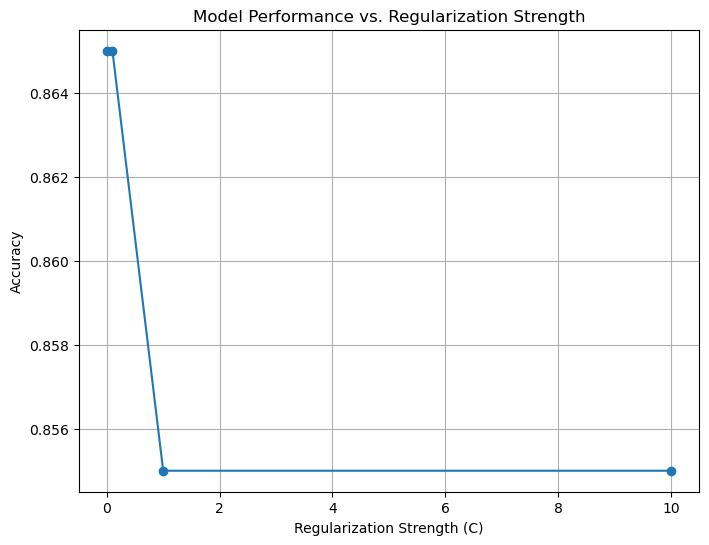

In [10]:
# Hyperparameter tuning: Regularization strength (C)
C_values = [0.01, 0.1, 1, 10]

# Lists to store accuracy scores for different C values
accuracy_scores = []

# Loop through each C value, create and train the model, and evaluate its performance
for C in C_values:
    logistic_model_tuned = LogisticRegression(C=C)
    logistic_model_tuned.fit(X_train, y_train)
    y_pred_tuned = logistic_model_tuned.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    accuracy_scores.append(accuracy_tuned)

# Plot the accuracy scores for different C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracy_scores, marker='o')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Regularization Strength')
plt.grid(True)
plt.show()

<div class="alert alert-success">  
<h3><strong>Cross Validation</strong></h3>
</div>

In [ ]:
# import libreries
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
# load the breast cancer dataset
data = pd.read_csv('breast_cancer.csv')
features=data.drop('target', axis=1)

# define the K-Fold cross-validation object with 5 folds
kf = KFold(n_splits=5)

# initialize a logistic regression model
model = LogisticRegression()
scores=[]

cnt=1

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(features, data.target):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    # split the data into training and testing sets
    X_train, X_test = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train, y_test = data.target[train_index], data.target[test_index]  
    # fit the model on the training data
    model.fit(X_train, y_train)

    # evaluate the model on the testing data
    score = model.score(X_test, y_test)
    scores.append(score)
    # print the accuracy score for each fold
    print("Accuracy:", score)

# calculate the mean accuracy score across all folds
mean_score = np.mean(scores)
print("Mean accuracy:", mean_score)


**Cara Paling Simple Menggunakan Cross Validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# initialize a logistic regression model
model = LogisticRegression()

# perform 5-fold cross-validation and get the accuracy scores for each fold
scores = cross_val_score(model, features,data[['target']], cv=5)

# print the accuracy scores for each fold and the mean accuracy score
print("Accuracy scores for each fold:", scores)
print("Mean accuracy score:", scores.mean())

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC


# Varying values of C
param_range = np.logspace(-3, 3, 10)

# Calculate validation scores for varying C values
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range, cv=5, scoring="accuracy"
)


<div class="alert alert-success">  
<h3><strong>Hyperparameter Tuning (Case Study)</strong></h3>
</div>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('train_ghosts.csv')

In [ ]:
# Spliting target variable and independent variables
# using pd.get_dummies for one hot encoding the categorical data
X = pd.get_dummies(df.drop(['type','id'], axis = 1))
y = df['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Find best hyperparameter dan best mean score from decision tree classifier model with only max_depth parameter GridSearchCV**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a decision tree classifier with only max_depth parameter
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 21)}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Compute the cross-validation scores for the Random Forest classifier
scores = cross_val_score(dt, X_train, y_train, cv=5)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean score: {grid_search.best_score_}")

**Find best hyperparameter dan best mean score from decision tree classifier model with max_depth and min_samples_leaf parameter GridSearchCV**

In [ ]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 21),
              'min_samples_leaf': range(1, 11)}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean score: {grid_search.best_score_}")


**Find best hyperparameter dan best mean score from random forest classifier model with max_depth, min_samples_leaf, dan n_estimators parameter GridSearchCV**

In [ ]:
"""Use GridSearchCV to search over a range of values 
for max_depth (from 1 to 20) and n_estimators (from 1 to 10) 
hyperparameters to find the combination that yields the best performance."""

# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a decision tree classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 21), 
              'n_estimators': range(1, 11), #n_estimators merupakan parameter khusus dari random forest tidak terdapat di decision tree classifier
              'min_samples_leaf': range(1,11)}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean score: {grid_search.best_score_}")

**Find best hyperparameter dan best mean score from decision tree classifier model with max_depth using RandomizedSearchCV**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 21)}

# Create a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(dt, param_grid, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best mean score: {random_search.best_score_}")